# Timeseries

---
**Overview.**  We introduce the tools for working with dates, times, and time series data. We start with functionality built into python itself, then discuss how pandas builds on these tools to add powerful time series capabilities to DataFrames.

**Outline**

- [Quandl](#data): We show how to use the quandl package to access a large database of financial and economic dat.
- [Dates in python](#datetime): covers the basics of working with dates and times in python
- [Dates in pandas](#pandas_dates): shows how to use dates with pandas objects


**Note: requires internet access to run.**  

This Jupyter notebook was created by Chase Coleman and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  

In order to run the code in this notebook, you will need to have the quandl package installed. You can do this from the command line using

```
pip install quandl --upgrade
```

---

In [1]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np
%matplotlib inline    
plt.style.use("ggplot")

# quandl package
import quandl

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('quandl version: ', quandl.version.VERSION)
print('Today: ', dt.date.today())

# helper function to print info about dataframe

def df_info(df):
    print("Shape: ", df.shape)
    print("dtypes: ", df.dtypes.to_dict())
    print("index dtype: ", df.index.dtype)
    return pd.concat([df.head(3), df.tail(3)])

Python version: 3.5.2 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.18.1
quandl version:  3.0.1
Today:  2016-12-15


## Quandl <a id=data></a>

[quandl](https://www.quandl.com) is a company that collects and maintains financial and economic data from standard sources (e.g. FRED, IMF, BEA, etc.) and non-standard sources (Fx data, company level data, trader receipts). The data is viewable on their webpage (see [here](https://www.quandl.com/data/BLSN-BLS-International) or [there](https://www.quandl.com/data/USTREASURY-US-Treasury) for examples), but made available to programming languages via their API. We will access their [API](https://www.quandl.com/docs/api#introduction) using their [python library](https://www.quandl.com/tools/python).

Suppose, for example, that we wanted to get data on taxes in the US. Here's how we might find some:

- Open up the quandl [search page](https://www.quandl.com/search)
- Type in ["US tax revenue"](https://www.quandl.com/search)
- Click on [one of the results](https://www.quandl.com/data/OECD/REV_NES_TOTALTAX_TAXUSD_USA-United-States-Total-Total-Tax-Revenue-Total-Tax-Revenue-In-Usd) that seems interesting to us
- Checkout things like the frequency (Annual for this data set), the quandl code (top right, here it is `OECD/REV_NES_TOTALTAX_TAXUSD_USA`) and description.

**Exercise** (5 min): Go to Quandl's website and explore some of the data quandl has available. Come up with 2 datasets and make a dictionary that maps the quandl code into a reasonable name. For example, for the us tax revenue dataset above I could have done

```python
my_data = {"OECD/REV_NES_TOTALTAX_TAXUSD_USA": "US_tax_rev"}
```

We can download the data using the `quandl.get` function and passing it one of the Quandl codes we collected in the previous exercise

In [2]:
us_tax = quandl.get("OECD/REV_NES_TOTALTAX_TAXUSD_USA")
df_info(us_tax)

Shape:  (51, 1)
dtypes:  {'Value': dtype('float64')}
index dtype:  datetime64[ns]


,Value
Date,
1965-12-31,167022.00
1966-12-31,186065.00
1967-12-31,208577.00
2013-12-31,4283028.74
2014-12-31,4500529.62
2015-12-31,4754119.88


We can also pass `start_date` and `end_date` parameters to control the dates for the downloaded data:

In [3]:
us_tax_recent = quandl.get("OECD/REV_NES_TOTALTAX_TAXUSD_USA", start_date="2000-01-01")
df_info(us_tax_recent)

Shape:  (16, 1)
dtypes:  {'Value': dtype('float64')}
index dtype:  datetime64[ns]


,Value
Date,
2000-12-31,2900519.06
2001-12-31,2884729.87
2002-12-31,2738000.14
2013-12-31,4283028.74
2014-12-31,4500529.62
2015-12-31,4754119.88


Now, let's read in the data sets we found were interesting. Feel free to use the codes you looked up, or the ones I'm using here. 

In [4]:
my_data = {
    "FRED/DFF": "risk_free_rate",
    "NVCA/VENTURE_3_09C": "vc_investments"
}

dfs = []

for k in my_data.keys():
    dfs.append(quandl.get(k))

In [5]:
df_info(dfs[0])

Shape:  (126, 5)
dtypes:  {'Total': dtype('float64'), 'Later Stage': dtype('float64'), 'Early Stage': dtype('float64'), 'Seed': dtype('float64'), 'Expansion': dtype('float64')}
index dtype:  datetime64[ns]


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-31,153.0000,96.3000,219.5000,154.4000,623.1000
1985-06-30,146.5000,185.3000,319.6000,89.4000,740.8000
1985-09-30,93.7000,106.3000,312.8000,164.4000,677.2000
2015-12-31,482.5349,5193.9647,3282.8216,3167.6023,12126.9235
2016-03-31,561.8670,4601.1276,4010.2623,3516.5483,12689.8052
2016-06-30,534.7283,3962.5863,8507.1810,2286.6906,15291.1862


In [6]:
df_info(dfs[1])

Shape:  (22812, 1)
dtypes:  {'VALUE': dtype('float64')}
index dtype:  datetime64[ns]


,VALUE
DATE,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
2016-12-11,0.41
2016-12-12,0.41
2016-12-13,0.41


So, `"FRED/DFF"` is the [federal funds rate](https://fred.stlouisfed.org/series/FEDFUNDS), or the interest rate at which banks can trade federal assets with eachother overnight. This is often used as a proxy for the risk free rate i economic analysis. 

From the printout above it looks like we have more than 22k observations starting in 1954 at a daily frequency.

Notice, however that the column name is `VALUE`. Let's use our dict to clean up that name:

In [7]:
dfs[0].rename(columns={"VALUE": my_data["FRED/DFF"]}, inplace=True)
df_info(dfs[0])

Shape:  (126, 5)
dtypes:  {'Total': dtype('float64'), 'Later Stage': dtype('float64'), 'Early Stage': dtype('float64'), 'Seed': dtype('float64'), 'Expansion': dtype('float64')}
index dtype:  datetime64[ns]


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-31,153.0000,96.3000,219.5000,154.4000,623.1000
1985-06-30,146.5000,185.3000,319.6000,89.4000,740.8000
1985-09-30,93.7000,106.3000,312.8000,164.4000,677.2000
2015-12-31,482.5349,5193.9647,3282.8216,3167.6023,12126.9235
2016-03-31,561.8670,4601.1276,4010.2623,3516.5483,12689.8052
2016-06-30,534.7283,3962.5863,8507.1810,2286.6906,15291.1862


The second dataframe we dowloaded (using code `NVCA/VENTURE_3_09C`) contains quarterly data on total investment by venture capital firms in the US, broken down by the stage of the project.

The column names here are ok, so we don't need to change anything.

**Exercise (5 min)** do a simlar analysis/report for whatever datasets you chose to work with. Make sure to do the following:

- Make note of the frequency of the data (e.g. daily, monthly, quarterly, yearly, etc.)
- Check the column names

If you chose to use the same data as me, do something interesting with the data. Perhaps construct plots of differenet variables, or compute summary statistics -- use your imagination here.

So that we have the data easily acessible for later on, let's store these two variables in individual dataframes:

In [8]:
ffr = dfs[0]
vc = dfs[1]

## Dates in python <a id=datetime></a>

The date and time functionality in python comes from the built in `datetime` module. Notice above that we ran

```python
import datetime as dt
```

We've been using the `dt.date.today()` function throughout this course when we print the date at the top of our notebooks, but we haven't given it very much thought. Let's take a closer look now.

To start, let's see what the type of `dt.date.today()` is

In [9]:
today = dt.date.today()
print("the type of today is ", type(today))

the type of today is  <class 'datetime.date'>


Given that we have an object of type `datetime.date` we can do things like ask for the day, month, and year

In [10]:
print("the day of the month is: ", today.day)
print("we are curretly in month number", today.month)
print("The year is", today.year)

the day of the month is:  15
we are curretly in month number 12
The year is 2016


### timedelta

Suppose that we wanted to construct a "days until" counter.

To do this we will construct another `datetime.date` and use the `-` operator to find the differene between the other date and today.

In [17]:
# construct a date by hand
new_years_eve = dt.date(2016, 12, 31)

In [18]:
until_nye = new_years_eve - today

In [19]:
type(until_nye)

datetime.timedelta

We can get the number of days until new years eve by looking at `until_nye.days`

In [20]:
until_nye.days

16

**Exercise (5 min)**: write a python function named `days_until` that accepts one argument (a `datetime.date`) and returns the number of days between today and that date. Apply your function to 

- December 15, 2016 (day the UG project is due)
- Your birthday (HINT: unless your birthday is in late December, make sure to do 2017 as the year)

We could also construct a `datetime.timedelta` by hand and add it to an existing date. Here's an example to see how many days until Spencer turns 30

In [14]:
spencer_bday = dt.date(1989, 4, 25)

# NOTE: add 7 for the 7 leap years between 1989 and 2019
thirty_years = dt.timedelta(days=365*30 + 7)

In [15]:
# check to make sure it is still April 25th
spencer_bday + thirty_years

datetime.date(2019, 4, 25)

In [16]:
days_to_30 = (spencer_bday + thirty_years - today).days
print("Spencer will be 30 in {} days".format(days_to_30))

Spencer will be 30 in 861 days


### datetime

Being able to work with dates and the difference between dates is very useful, but sometimes we need to also think about times. To do that, we will look to the `dt.datetime` module.

We can get the current date and time using `dt.datetime.now()`:

In [11]:
now = dt.datetime.now()
print("type of now:", type(now))
now

type of now: <class 'datetime.datetime'>


datetime.datetime(2016, 12, 15, 17, 50, 13, 447210)

The numbers in the printout above are `year`, `month`, `day`, `hour`, `minute`, `second`, `millisecond`.

Because we still have day, month, year information ; we can access these properties just as we did for the `today`  above:

In [12]:
print("the day of the month is: ", now.day)
print("we are curretly in month number", now.month)
print("The year is", now.year)

the day of the month is:  15
we are curretly in month number 12
The year is 2016


**Exercise (2 min)**: Use tab completion to see what else we can access on our `dt.datetime` object `now`

Time deltas work the same way with `datetime` objects as they did with `date` objects.

We can see how many seconds until Spencer turns 30:

In [21]:
# NOTE: we can only do arithmetic between many date objects or datetime obejcts
#       we cannot add or subtract a datetime to/from a date. So, we need to 
#       re-create spencer_bday as a datetime object. 
# NOTE: The timedelta object is already compatible with date and datetime objects
spencer_bday_time = dt.datetime(1989, 4, 25, 16, 33, 5)
seconds_to_30 = (spencer_bday_time + thirty_years - now).seconds

print("Spencer will be 30 in {} seconds".format(seconds_to_30))

Spencer will be 30 in 81771 seconds


### strftime

Once we have date and time information, a very common thing to do is to print out a formatted version of that date. For example, suppose we wanted to print out a string in the format `YYYY-MM-DD`. To do this we use the `strftime` method. Here's an example

In [22]:
print(today.strftime("Today is %Y-%m-%d"))

Today is 2016-12-15


Notice that the argument to `strftime` is a python string that can contain normal text (e.g. `Today is`) and a special formatters (the stuff starting with `%`). We haven't talked much about how to do string formatting, but in Python and many other languages using `%` inside strings has special meaning.

**Exercise (6 min)** Using the [documentation](https://docs.python.org/3.5/library/datetime.html#strftime-strptime-behavior) for the string formatting behavior, figure out how to write the following strings using the method `strftime` method on the `spencer_bday_time` object

- "Spencer was born on 1989-04-25"
- "Spencer was born on a Tuesday"
- "Spencer was born on Tuesday, April 25th"
- (**bonus**) "Spencer was born on Tuesday, April 25th at 04:33 PM"

In [23]:
spencer_bday_time.strftime("Spencer was born on %A, %B %dth at %I:%M %p")

'Spencer was born on Tuesday, April 25th at 04:33 PM'

## Dates in Pandas <a id=pandas_dates></a>

Now we will look at how to use date and dateime functionality in pandas.

To begin, lets take a closer look at the type of index we have on our `ffr` and `vc` dataframes:

In [24]:
type(ffr.index)

pandas.tseries.index.DatetimeIndex

Here we have a `DatetimeIndex`, which menas pandas recogizes this DataFrame as containing time series data. 

What can we do now? A lot, here's a brief list:

- `subset` the data using strings to get data for a particular time frame
- `resample` the data to a diffrent frequency: this means we could convert daily to monthly, quarterly, etc.
- quickly access things like `year`, `month`, and `day` for the observation
- rolling computations: this will allow us to compute statistics on a rolling subset of the data. We'll show a simple example here, but check out the [docs](http://pandas.pydata.org/pandas-docs/stable/computation.html#window-functions) for more info
- `snap` the observations to a particular frequency -- this one is a bit advanced and we won't cover it here

For a much more comprehensive list with other examples see the [docs](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#datetimeindex)

For now, let's look at how to do these things with the data we obtained from quandl

**NOTE** You can _only_ do these things when you have a `DatetimeIndex`. This means that even if one of the columns in your DataFrame has date or datetime information, you will need to set it as the index to access this functionality.

### subsetting 

Suppose we wanted to extract all the data for the federal funds rate for the year 2008.

In [25]:
ffr2008 = ffr["2008"]
print("ffr2008 is a", type(ffr2008))
df_info(ffr2008)

ffr2008 is a <class 'pandas.core.frame.DataFrame'>
Shape:  (4, 5)
dtypes:  {'Total': dtype('float64'), 'Later Stage': dtype('float64'), 'Early Stage': dtype('float64'), 'Seed': dtype('float64'), 'Expansion': dtype('float64')}
index dtype:  datetime64[ns]


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
2008-03-31,460.1514,1446.9379,3482.6370,2798.8813,8188.6076
2008-06-30,520.2955,1595.4758,2818.1348,3123.4292,8057.3353
2008-09-30,605.8082,1439.8898,2571.8795,3112.4632,7730.0407
2008-06-30,520.2955,1595.4758,2818.1348,3123.4292,8057.3353
2008-09-30,605.8082,1439.8898,2571.8795,3112.4632,7730.0407
2008-12-31,370.9541,1569.9787,2315.4418,2201.3975,6457.7721


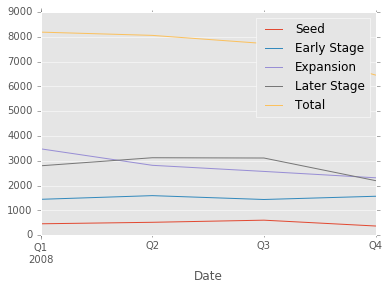

In [26]:
ffr2008.plot()

Suppose we want to restrict to September 2008:

In [27]:
ffr_sep2008 = ffr["2008-09"]
df_info(ffr_sep2008)

Shape:  (1, 5)
dtypes:  {'Total': dtype('float64'), 'Later Stage': dtype('float64'), 'Early Stage': dtype('float64'), 'Seed': dtype('float64'), 'Expansion': dtype('float64')}
index dtype:  datetime64[ns]


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
2008-09-30,605.8082,1439.8898,2571.8795,3112.4632,7730.0407
2008-09-30,605.8082,1439.8898,2571.8795,3112.4632,7730.0407


We can use this same functionality to extract ranges of dates. To get the data starting in june 2007 and going until march 2011 we would do

In [28]:
ffr2 = ffr["2007-06":"2011-03"]
df_info(ffr2)

Shape:  (16, 5)
dtypes:  {'Total': dtype('float64'), 'Later Stage': dtype('float64'), 'Early Stage': dtype('float64'), 'Seed': dtype('float64'), 'Expansion': dtype('float64')}
index dtype:  datetime64[ns]


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
2007-06-30,497.2470,1734.1126,2345.9235,3325.0876,7902.3707
2007-09-30,460.3065,1294.2212,3084.4873,3361.8846,8200.8996
2007-12-31,558.3729,1904.9306,2913.5818,3136.4166,8513.3019
2010-09-30,341.7186,1455.3298,1642.9529,2054.1624,5494.1637
2010-12-31,225.6879,1791.5509,2260.4050,1443.1226,5720.7664
2011-03-31,216.2328,1931.6053,2188.6025,2190.0105,6526.4511


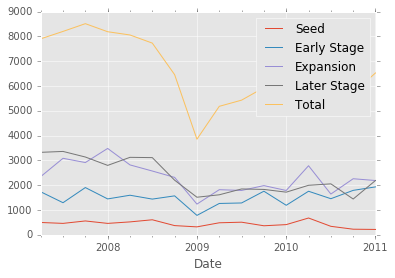

In [29]:
ffr2.plot()

**Exercise (3 min)** Using one of your datasets from quandl, plot one or more variables for the last 3 years (2013 through 2016)

### resampling

Now suppose that instead of daily data, we wanted our federal funds data at a monthly frequency.

To do this we use the `resample` method on our DataFrame

In [30]:
# MS means "month start"
ffrM_resample = ffr.resample("MS")
type(ffrM_resample)

pandas.tseries.resample.DatetimeIndexResampler

Notice that when we call `resample` we don't get back a DataFrame at that frequency. This is because there is some ambiguity regarding just _how_ the frequency should be converted: should we take the average during the period, the first observation, last observation, sum the observations?

In order to get a DataFrame we have to call a method on our `DatetimeIndexResampler` object. For this example, let's do the first observation in each period:

In [31]:
ffrM = ffrM_resample.first()
df_info(ffrM)

Shape:  (376, 5)
dtypes:  {'Total': dtype('float64'), 'Later Stage': dtype('float64'), 'Early Stage': dtype('float64'), 'Seed': dtype('float64'), 'Expansion': dtype('float64')}
index dtype:  datetime64[ns]


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-01,153.0000,96.3000,219.500,154.4000,623.1000
1985-04-01,NaN,NaN,NaN,NaN,NaN
1985-05-01,NaN,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN
2016-06-01,534.7283,3962.5863,8507.181,2286.6906,15291.1862


Note that we can also combine numbers with the specification of the resampling frequency. As an example, we can resample to a bi-weekly frequency using

In [32]:
ffr.resample("2w")

/Users/vijaydas/anaconda/lib/python3.5/site-packages/IPython/lib/pretty.py:108: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  return getattr(obj, attr, default)


,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-31,153.0000,96.3000,219.5000,154.4000,623.1000
1985-04-14,NaN,NaN,NaN,NaN,NaN
1985-04-28,NaN,NaN,NaN,NaN,NaN
1985-05-12,NaN,NaN,NaN,NaN,NaN
1985-05-26,NaN,NaN,NaN,NaN,NaN
1985-06-09,NaN,NaN,NaN,NaN,NaN
1985-06-23,NaN,NaN,NaN,NaN,NaN
1985-07-07,146.5000,185.3000,319.6000,89.4000,740.8000
1985-07-21,NaN,NaN,NaN,NaN,NaN


**Exercise (5 min)**: Using the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) for the most common frequencies, figure out how to resample one of your datasets to 

- A quarterly frequency -- make sure to get the _start_ of the quarter
- An annual frequency -- use the end of the _year_

**more than you need**: I want to point out that when you use the `first` or `last` methods to perform the aggregations, there are two dates involved: (1) the date the resultant index will have and (2) the date used to fill in the data at that date. The first date (one on the index) will be assigned based on the string you pass to the `resample` method. The second date (the one for extracting data from the original dataframe) will be determined based on the method used to do the aggregation. `first` will extract the first data point from that subset and `last` will extract the last.

Let's see some examples:

In [33]:
ffr.resample("M").first().head()

,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-31,153.0,96.3,219.5,154.4,623.1
1985-04-30,NaN,NaN,NaN,NaN,NaN
1985-05-31,NaN,NaN,NaN,NaN,NaN
1985-06-30,146.5,185.3,319.6,89.4,740.8
1985-07-31,NaN,NaN,NaN,NaN,NaN


In [34]:
ffr.resample("M").last().head()

,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-31,153.0,96.3,219.5,154.4,623.1
1985-04-30,NaN,NaN,NaN,NaN,NaN
1985-05-31,NaN,NaN,NaN,NaN,NaN
1985-06-30,146.5,185.3,319.6,89.4,740.8
1985-07-31,NaN,NaN,NaN,NaN,NaN


Notice that the index is the same on both, but the data is clearly different.

If we use `MS` instead of `M` we will have the index based on the first day of the month:

In [35]:
ffr.resample("MS").first().head()

,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-01,153.0,96.3,219.5,154.4,623.1
1985-04-01,NaN,NaN,NaN,NaN,NaN
1985-05-01,NaN,NaN,NaN,NaN,NaN
1985-06-01,146.5,185.3,319.6,89.4,740.8
1985-07-01,NaN,NaN,NaN,NaN,NaN


In [36]:
ffr.resample("MS").last().head()

,Seed,Early Stage,Expansion,Later Stage,Total
Date,,,,,
1985-03-01,153.0,96.3,219.5,154.4,623.1
1985-04-01,NaN,NaN,NaN,NaN,NaN
1985-05-01,NaN,NaN,NaN,NaN,NaN
1985-06-01,146.5,185.3,319.6,89.4,740.8
1985-07-01,NaN,NaN,NaN,NaN,NaN


Notice how the data associated with `"M"` and `first` is the same as the data for `"MS"` and `first`. The same holds for `last`.

### Access year, month, day...

Given a `DatetimeIndex` you can access the day, month, or year (also second, millisecond, etc.) by simply accessing the `.XX` property; where `XX` is the data you want

In [37]:
ffr.index.year

array([1985, 1985, 1985, 1985, 1986, 1986, 1986, 1986, 1987, 1987, 1987,
       1987, 1988, 1988, 1988, 1988, 1989, 1989, 1989, 1989, 1990, 1990,
       1990, 1990, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1993,
       1993, 1993, 1993, 1994, 1994, 1994, 1994, 1995, 1995, 1995, 1995,
       1996, 1996, 1996, 1996, 1997, 1997, 1997, 1997, 1998, 1998, 1998,
       1998, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2001, 2001,
       2001, 2001, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2004,
       2004, 2004, 2004, 2005, 2005, 2005, 2005, 2006, 2006, 2006, 2006,
       2007, 2007, 2007, 2007, 2008, 2008, 2008, 2008, 2009, 2009, 2009,
       2009, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2012, 2012,
       2012, 2012, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2015,
       2015, 2015, 2015, 2016, 2016], dtype=int32)

In [38]:
ffr.index.day

array([31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31,
       30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30,
       30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30,
       31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31,
       31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31,
       30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30,
       30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30, 31, 31, 30, 30,
       31, 31, 30, 30, 31, 31, 30], dtype=int32)

In [39]:
ffr.index.month

array([ 3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,
        6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,
        9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9,
       12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,
        3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,
        6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,
        9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9, 12,  3,  6,  9,
       12,  3,  6,  9, 12,  3,  6], dtype=int32)

### Rolling computations

We can use pandas to do rolling computations.

For example, suppose we **want** to plot the maximum and minimum of the risk free rate within the past week at each date (think about that slowly -- for every date, we want to look back 7 days and compute the max).

Here's how we can do that

In [ ]:
fig, ax = plt.subplots()
ffr.rolling(window=7).max().plot(ax=ax)
ffr.rolling(window=7).min().plot(ax=ax)
ax.legend(["max", "min"])

Note that this is different from just resampling because we will have an observation for every date in the original dataframe (except the number of dates at the front needed to construct the initial window).

In [ ]:
ffr.rolling(window=7).max().head(10)

In [ ]:
ffr.resample("7D").max().head(10)

### Merging with dates

Let's see what happens when we merge the ffr and vc datasets

In [ ]:
# do a left merge on the index (date info)
df = pd.merge(ffr, vc, left_index=True, right_index=True, how="left")
df_info(df)

In [ ]:
vc.head()

Notice that we ended up with a lot of missing data. This happened for two reasons:

1. The ffr data goes back to 1954, but the vc data starts in 1985
2. The ffr data is at a daily frequency, but vc is at quarterly.

To resolve the first issue we can subset the ffr data and only keep from 1985 on

In [ ]:
ffr_recent = ffr["1985":]

To resolve the second issue we will do two-steps:

1. resample the `ffr` data to a monthly frequency
2. resample the `vc` data to a monthly frequency by _padding_. This is called upsampling because we are going from a lower frequency (quarterly) to a higher one (monthly)

In [ ]:
ffr_recentM = ffr_recent.resample("M").first()
vc_M = vc.resample("M").pad()

In [ ]:
vc_M.head()

Notice that using `pad` here just copied data forwards to fill in missing months (e.g. the data for March 1985 was applied to April and May)

Now let's try that merge again

In [ ]:
df = pd.merge(ffr_recentM, vc_M, left_index=True, right_index=True, how="left")
print(df.head(6))
print("\n\n", df.tail(8))

That looks much better -- we have missing data at the top and the bottom for months that aren't available in the venture capital dataset, but nothing else should be missing.

Let's try to do something interesting with this data. We **want** to plot the growth rate in the risk free rate, early stage vc funding, and total vc funding for the months following the start of the dotcom boom (rougly Jan 1995) and the housing boom (roughly Jan 2004). 

Read that again carefully. 

For each of the three series we want 2 lines. For each line, the x axis will be quarters since start of boom. The y axis growth rates since first month of bubble.

In [ ]:
# subset the data, then remove datetime index as we don't need it again
post_dotcom = df["1995":].reset_index(drop=True)
post_housing = df["2004":].reset_index(drop=True)

# take logs so we can do growth rates as log(x_{t+N}) - log(x_t)
post_dotcom = np.log(post_dotcom)
post_housing = np.log(post_housing)

dotcom_growth = post_dotcom - post_dotcom.iloc[0, :]
housing_growth = post_housing - post_housing.iloc[0, :]

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10, 5))

variables = ["risk_free_rate", "Early Stage", "Total"]

for i in range(len(variables)):
    var = variables[i]
    
    # add dotcom line
    dotcom_growth[var].plot(ax=axs[i])
    
    # add housing line
    housing_growth[var].plot(ax=axs[i])
    
    # set title
    axs[i].set_title(var)

# set legend and xlabel on last plot only
axs[-1].legend(["dotcom", "housing"])
axs[-1].set_xlabel("Quarters since boom")
        
# make subplots not overlap
fig.tight_layout()

So we see that these booms were qualitatively different in terms of the response of the risk free rate and venture capital funding.